# Two Agent Copilot<br/>with Agent Proxy

This is a sample of two Assistants being used as agents in a complex Copilot solution.

Agents:
- **Sales Agent:** It is implemented with an Assistants API that can perform calculations and can provide the user information customer, sellers, customer orders, and inventory.
- **Trading Agent:** It is implemented with an Assistant API with function calling and code interpreter to get the latest stock prices and can provide the user with up to date prices and perform portfolio calculations.

Coordination:
- **Agent Proxy:** This agent coordinates which agent to call depending on user's intent.

Possible messages handling options:
1. No handling: a la LLM model
2. Manual handling: user write logic to coordinate messages between two agent
3. Hybrid: One agent keeps state the other just used as LLM

Diagram:

![Two agent Assistant Diagram](../images/proxy-two-agent-diagram.png)

### Load the required libraries

In [13]:
import sales_agent
import trading_agent
from AgentProxy import AgentProxy
from AgentRegistration import AgentRegistration
from AgentSettings import AgentSettings
from openai import AzureOpenAI

### Load the environment variables

In [14]:
settings = AgentSettings()

In [15]:
client = AzureOpenAI(api_key=settings.api_key,
        api_version=settings.api_version,
        azure_endpoint=settings.api_endpoint)

### Create the AzureOpenAI client

In [16]:
trading_agent = trading_agent.get_agent(settings,client)

In [17]:
sales_agent = sales_agent.get_agent(settings,client)

data/sales/sellers.csv
data/sales/customers.csv
data/sales/orders.csv
data/sales/inventory.csv


In [18]:
sales_agent_registration = AgentRegistration(settings, client, "SalesIntent","questions or operations related to calculations, customers, sales, orders, inventory, items, and sellers.",sales_agent)

In [19]:
trading_agent_registration = AgentRegistration(settings, client, "TradingIntent","questions or operations related to trading, stocks, investments, and financial markets.",trading_agent)

In [20]:
proxy = AgentProxy(settings, client, [sales_agent_registration, trading_agent_registration])

### Have a conversation with the Assistant

In [21]:
proxy.process_for_intent("Suzan", "user_123", "What is the speed of light?")

The speed of light in a vacuum is exactly 299,792,458 meters per second (approximately 186,282 miles per second). This speed is also used as a fundamental constant in the field of physics, denoted by the symbol 'c.' The constancy of the speed of light for all observers, regardless of their relative motion, is a key postulate of Albert Einstein's theory of special relativity.


processing ...
user: John:
Chart the products sold by State?

assistant:
In order to chart the products sold by State, I first need to examine the contents of the files you've uploaded to determine which contains the relevant data. Once the data is identified and prepared, I can create a chart for you. I will start by checking the contents of each uploaded file.

assistant:
The contents of the files are as follows:

1. First file (`assistant-JjaZ1SX8Vlq2wX9GpqLW5XsF`) contains seller information with columns: SellerID, Name, State.
2. Second file (`assistant-zhmF0g6uN3niCMg4cN8ndSyE`) contains customer information with columns: CustomerID, Name, State.
3. Third file (`assistant-m9nGPeHRYqTse0qOfIos0wqh`) contains order information with columns: OrderID, CustomerID, SellerID, ItemID, Qty, Price.
4. Fourth file (`assistant-olzDhTNnLIps7MhA8fNfmPyc`) contains item descriptions with columns: ItemID, Description.

To chart the products sold by State, we could link the orders to sellers to g

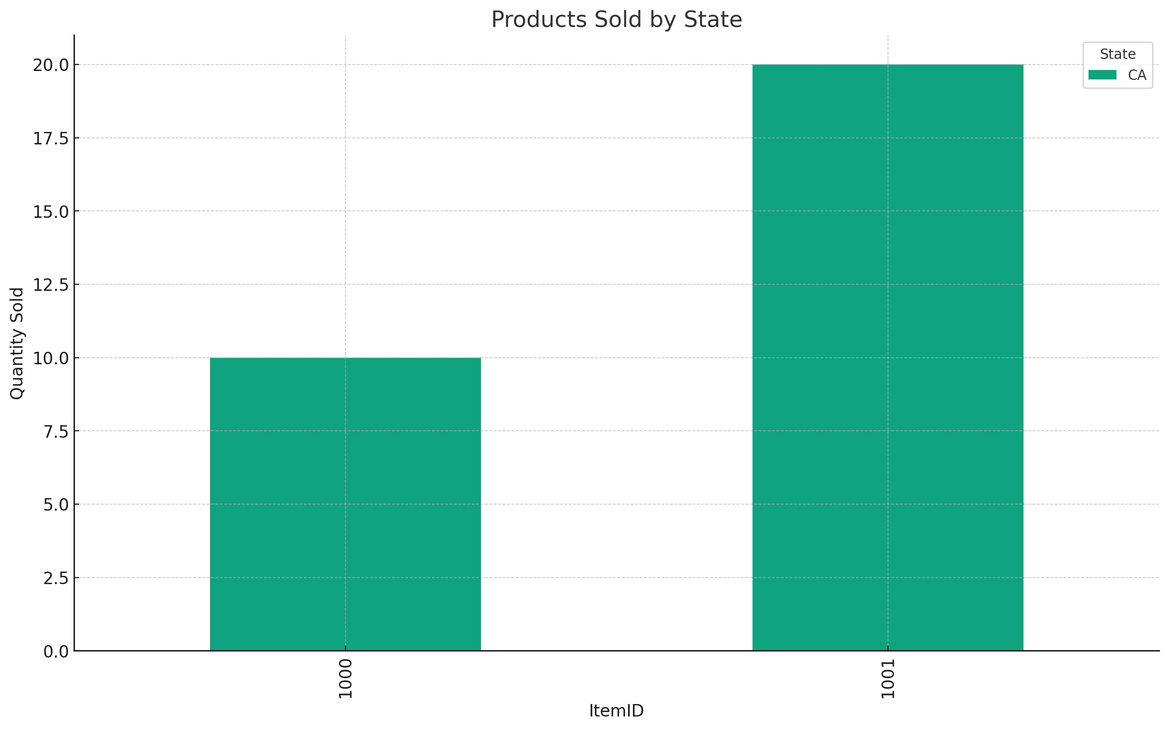

assistant:
The chart showing the products sold by state has been created. Each bar represents an item, and the stacked sections of each bar indicate the quantity of the product sold in each state.

Do you have any further questions or need additional assistance?

Deleted thread:  thread_hhLuo1WvOI8U3nKGiKCIKItU


In [22]:
proxy.process_for_intent("John", "user_123", "Chart the products sold by State?")

In [23]:
proxy.process_for_intent("John", "user_123", "What is the current MSFT price?")

processing ...
Function Calling
{'tool_calls': [{'id': 'call_KIuvPqwxX3F3tymVRLaAORUK', 'function': {'arguments': '{"symbol":"MSFT"}', 'name': 'get_stock_price'}, 'type': 'function'}]}
Submitting outputs back to the Assistant...
user: John:
What is the current MSFT price?

assistant:
The current price of Microsoft Corporation (MSFT) stock is $407.79. If you have any further questions, please let me know.

Deleted thread:  thread_7ljU49e60PENLHjCzVrQpP7k


### Cleanup

In [24]:
sales_agent.cleanup()
trading_agent.cleanup()

AssistantDeleted(id='asst_Y6a3PGe69hj336wU6CmwmkeI', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  4  files.
FileDeleted(id='assistant-JjaZ1SX8Vlq2wX9GpqLW5XsF', deleted=True, object='file')
FileDeleted(id='assistant-zhmF0g6uN3niCMg4cN8ndSyE', deleted=True, object='file')
FileDeleted(id='assistant-m9nGPeHRYqTse0qOfIos0wqh', deleted=True, object='file')
FileDeleted(id='assistant-olzDhTNnLIps7MhA8fNfmPyc', deleted=True, object='file')
AssistantDeleted(id='asst_yetqKkp1IkLZPNi8HFDEMDhk', deleted=True, object='assistant.deleted')
Deleting:  0  threads.
Deleting:  0  files.
